In [5]:
%store -r df y_target

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

In [7]:
#X = pd.get_dummies(df[["emp_length", "home_ownership", "verification_status", "annual_inc", "pub_rec_bankruptcies", "purpose"]], drop_first=True)
X = pd.get_dummies(df, drop_first=True)
#X = y_target[["sub_grade"]]


In [8]:
#sub_grades = list(np.sort(list(set(X["sub_grade"]))))
#sub_grades
#X["sub_grade_int"] = X["sub_grade"].apply(lambda x: sub_grades.index(x))

In [9]:
y_values = y_target["loan_status"].value_counts()
y_fully_paid, fully_paid_val = list(y_values.index[[0,2,3,6,7]]), 0
#y_delay, delay_val = list(y_values.index[[5,6,7]]), "charged_off"
y_charged_off, charged_off_val = list(y_values.index[[1,4,5,8]]), 1

y_target["loan_status_int"] = y_target["loan_status"]
y_target["loan_status_int"] = y_target["loan_status_int"].apply(lambda x : fully_paid_val if x in y_fully_paid else x)
#y_target["loan_status_int"] = y_target["loan_status_int"].apply(lambda x : delay_val if x in y_delay else x)
y_target["loan_status_int"] = y_target["loan_status_int"].apply(lambda x : charged_off_val if x in y_charged_off else x)

y_values = y_target["grade"].value_counts()

y_grade_AB, grade_AB_val = list(y_values.index[[0,1]]), 0
y_grade_CDEFG, grade_CDEFG_val = list(y_values.index[[2,3,4,5,6]]), 1

y_target["grade_int"] = y_target["grade"]
y_target["grade_int"] = y_target["grade_int"].apply(lambda x : grade_AB_val if x in y_grade_AB else x)
y_target["grade_int"] = y_target["grade_int"].apply(lambda x : grade_CDEFG_val if x in y_grade_CDEFG else x)

y_int_10, int_10_val = [5,6,7,8,9,10], 10
y_int_15, int_15_val = [11,12,13,14,15], 15
y_int_20, int_20_val = [16,17,18,19,20], 20
y_int_25, int_25_val = [21,22,23,24,25], 25


y_target["int_rate_int"] = df["int_rate"].astype("int")
y_target["int_rate_int"] = y_target["int_rate_int"].apply(lambda x : int_10_val if x in y_int_10 else x)
y_target["int_rate_int"] = y_target["int_rate_int"].apply(lambda x : int_15_val if x in y_int_15 else x)
y_target["int_rate_int"] = y_target["int_rate_int"].apply(lambda x : int_20_val if x in y_int_20 else x)
y_target["int_rate_int"] = y_target["int_rate_int"].apply(lambda x : int_25_val if x in y_int_25 else x)

In [10]:
y_target[["int_rate_int"]].value_counts()

int_rate_int
15              19021
10              16861
20               6245
25                408
dtype: int64

In [11]:
sum(y_target["loan_status_int"] == 0) / len(y_target)

0.8490184553896791

In [15]:
#X = pd.get_dummies(y_target["sub_grade"], drop_first=True)
y = y_target["grade"]
mask = y == y
X = X[mask]
#y = y_target["loan_status_int"]
y = y[mask]
#y = y_target["int_rate_int"]
#y.sum()

In [16]:
%store X y


Stored 'X' (DataFrame)
Stored 'y' (Series)


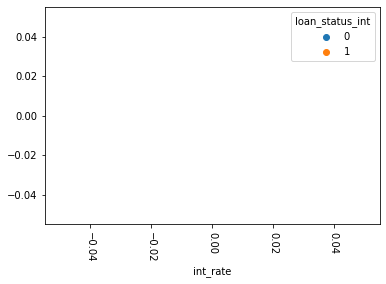

In [11]:
sns.scatterplot(x=X["int_rate"], hue=y_target["loan_status_int"])
plt.xticks(rotation=-90)
plt.plot();

In [12]:
X["loan_status"] = y

In [13]:
relatio = []
for grade in set(y_target["grade"]):
    grade_count = sum(y_target["grade"] == grade)
    grade_fully_paid = sum((y_target["grade"] == grade) & (y_target["loan_status_int"] == fully_paid_val))
    print(grade, grade_fully_paid, grade_count, grade_fully_paid / grade_count)
    relatio.append([grade, grade_fully_paid / grade_count])

A 9573 10183 0.9400962388294216
C 7238 8740 0.8281464530892448
G 338 512 0.66015625
D 4691 6016 0.7797539893617021
B 10871 12389 0.8774719509242069
F 887 1301 0.681783243658724
E 2515 3394 0.7410135533294049


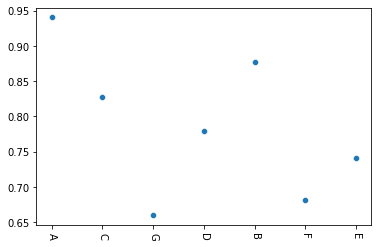

In [14]:
sns.scatterplot(x=[r[0] for r in relatio], y = [r[1] for r in relatio])
plt.xticks(rotation=-90)
plt.plot();

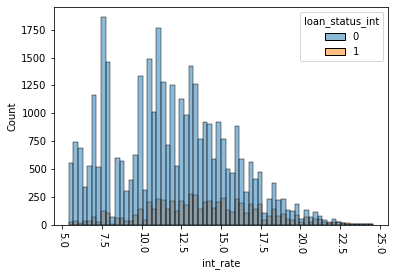

In [15]:
sns.histplot(x=df["int_rate"], hue = y_target["loan_status_int"])
plt.xticks(rotation=-90)
plt.plot();

In [16]:
y_target["int_rate_int"] = df["int_rate"].astype("int")

In [17]:
df.head(1)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,open_acc,revol_bal,pub_rec_bankruptcies
0,5000.0,36.0,10.65,162.87,10+ years,RENT,24000.0,Verified,734472,credit_card,27.65,3.0,13648.0,0.0


In [18]:
df.groupby([y_target["grade"], y_target["loan_status_int"]]).mean()

loan_amnt       term   int_rate  installment  \
grade loan_status_int                                                    
A     0                 8651.378878  37.005327   7.325976   257.588254   
      1                 7764.672131  37.455738   7.605295   230.679492   
B     0                11089.322509  41.013706  11.002065   322.451776   
      1                10750.823452  43.177866  11.101173   297.782352   
C     0                10855.056645  42.233766  13.499331   319.498062   
      1                10955.342876  44.276964  13.502577   309.776751   
D     0                11904.423364  44.144958  15.558073   359.441181   
      1                11651.339623  46.415094  15.644687   334.095125   
E     0                14765.039761  50.400000  17.353841   407.843821   
      1                14527.758817  51.945392  17.442366   391.469829   
F     0                16775.507328  52.369786  19.220417   466.605423   
      1                17954.347826  52.405797  19.361473   503.302246   
G     0                17512.278107  49.988166  20.478846   516.851686   
      1                16275.143678  49.103448  20.397644   490.579195   

                         annual_inc        issue_d        dti   open_acc  \
grade loan_status_int                                                      
A     0                67643.001837  734093.438734  11.962776   9.452996   
      1                52380.226836  734114.234426  13.310213   9.077176   
B     0                68983.443348  734069.837641  13.348159   9.187811   
      1                60263.843610  734052.020422  13.713307   9.205010   
C     0                69855.455890  733999.708207  13.750825   9.219718   
      1                60092.100100  733999.727031  14.307024   9.055925   
D     0                69775.834724  734003.673844  13.954133   9.197186   
      1                62900.125268  734007.864151  14.030528   9.206949   
E     0                77602.202700  734012.810338  14.144541   9.744232   
      1                70998.852742  734023.153584  14.264608   9.225256   
F     0                84927.062029  734028.121759  14.686979  10.496054   
      1                79067.357222  734006.454106  14.543913   9.893720   
G     0                98136.240473  733867.431953  15.827959  11.275148   
      1                83186.951897  733832.655172  15.410747  11.775862   

                          revol_bal  pub_rec_bankruptcies  
grade loan_status_int                                      
A     0                11799.588112              0.012535  
      1                11925.239344              0.014754  
B     0                14173.865054              0.043510  
      1                13980.589592              0.048748  
C     0                14424.904393              0.054020  
      1                14870.507989              0.073901  
D     0                15194.761458              0.049883  
      1                15808.923774              0.083019  
E     0                16977.310537              0.054076  
      1                15490.531286              0.086462  
F     0                18036.215333              0.063134  
      1                20067.229469              0.091787  
G     0                27060.443787              0.035503  
      1                22334.074713              0.126437

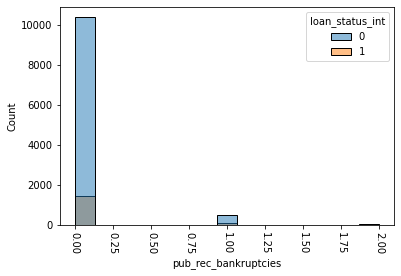

In [19]:
sns.histplot(x=X["pub_rec_bankruptcies"], hue=y_target["loan_status_int"])
plt.xticks(rotation=-90)
plt.plot();

In [20]:
plx.histogram(df, "home_ownership", color=y_target["loan_status_int"], facet_col=df["verification_status"])

In [41]:
plx.histogram(df, "loan_amnt", color=y_target["loan_status_int"], facet_col=df["verification_status"])

In [27]:
pd.pivot_table(df, y_target["loan_status_int"],  aggfunc="count")

KeyError: 0

In [37]:
2656/16098

0.16498943968194807

In [38]:
(1530 + 2236) / (8776 + 11235)

0.1881964919294388

In [36]:
df.groupby([df["verification_status"], y_target["loan_status_int"]]).count()[["annual_inc"]]

annual_inc
verification_status loan_status_int            
Not Verified        0                     16098
                    1                      2656
Source Verified     0                      8776
                    1                      1530
Verified            0                     11235
                    1                      2236

In [39]:
df.groupby([df["verification_status"], y_target["loan_status_int"]]).mean()[["loan_amnt"]]

loan_amnt
verification_status loan_status_int              
Not Verified        0                 8340.547758
                    1                 8718.994729
Source Verified     0                 9964.015497
                    1                10669.705882
Verified            0                15484.968847
                    1                16324.563953

In [35]:
df.groupby([y_target["loan_status_int"]]).mean()[["annual_inc"]]

,annual_inc
loan_status_int,
0,70170.789020
1,63321.373463
